# TASK-2: Prediction Using Supervised ML

## BY:SAYONITA GHOSH ROY

**In this Task, we are going to predict the percentage of marks of a student based on the number of study hours. This is a simple linear regression problem, since we have only two variables here. We will use the supervised ML algorithm, linear regression using Python Scikit-learn library and relevant other libraries.**

In [30]:
# Importing all libraries required in this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
# Loading the data
data=pd.read_excel("TASK-1_data.xlsx")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**Let us visualize the data using scatter plot**

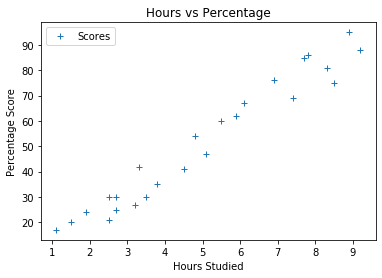

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

***From the above graph, we can clearly observe that there is a positive linear relation between the number of hours studied and percentage of score of students.***

## Preparing the data

**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [45]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

## Training the Algorithm

**We have split our data into training and testing sets, and now is finally the time to train our algorithm**

In [46]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

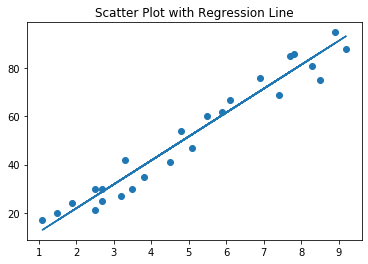

In [47]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title("Scatter Plot with Regression Line")
plt.plot(X, line);
plt.show()

## Making Predictions

**Now that we have trained our algorithm, it's time to make some predictions.**

In [48]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [49]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [50]:
# Computation of the required prediction
hours= [[9.25]]
required_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(required_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


## Evaluating the model

**The final step is to evaluate the performance of the algorithm. Here, we have chosen the mean square error as the metric.**

In [51]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502481
